# AutoEncoders for Dimensionality Reduction

+ [General Understanding for What is Auto Encoder?](https://blog.keras.io/building-autoencoders-in-keras.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dummy dataset using `make_blobs`

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples = 300,
                             n_features = 2,
                             centers=2,
                             cluster_std=1.0,
                             random_state=101)

In [4]:
X, y = data

### Create noises, just for demo purpose

In [5]:
np.random.seed(seed=101)

z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

## Create Features and Labels

In [6]:
feat = pd.DataFrame(X)

In [7]:
feat.head()

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676


### Add the noises

In [8]:

feat = pd.concat([feat, z_noise], axis=1)

In [9]:
feat.head()

,0,1,0
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


In [10]:
feat.columns = ['X1', 'X2', 'X3']

In [11]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


In [12]:
feat.shape

(300, 3)

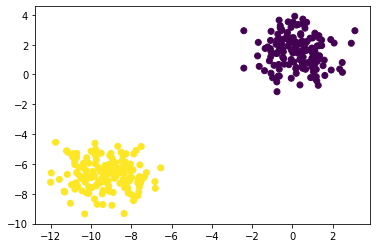

In [13]:
plt.scatter(feat['X1'], feat['X2'], c=y);

In our original data, those clusters are clearly separable.

## Plotting in 3D

+ https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# %matplotlib notebook

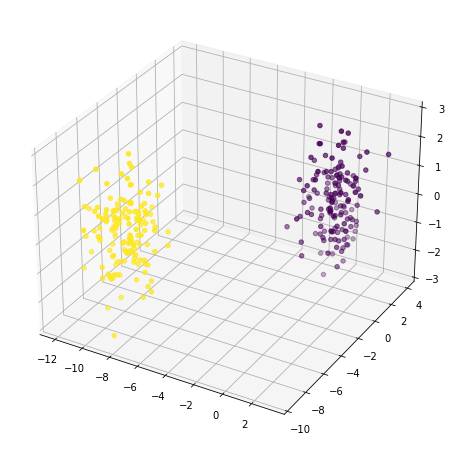

In [16]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y);

--------
-------

# Encoder and Decoder

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Stochastic Gradient Descent
+ allows to play with Learning rate, try to help out the autoencoder

In [18]:
from tensorflow.keras.optimizers import SGD # stochastic gradient descent

What we are going to do is 
+ start off with 3 inputs
+ reduce it down to 2 layers
+ expand it back to 3 neurons

In [19]:
# 3 ==> 2 ==> 3

In [20]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3])) # 3 features to 2 layers

In [21]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2])) # getting 2 outputs of previous layer as input

In [22]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss='mse', optimizer=SGD(lr=1.5)) # using stochastic gradient descent with learning rate of 1.5

# Scaling
Here we don't really split training, test etc unlike in supervised learning.
The reason is we are trying to reduce the dimensionality and we don't really know what is gonna look like.

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaled_feat = scaler.fit_transform(feat)

# Train Autoencoder

In [26]:
autoencoder.fit(scaled_feat, scaled_feat,
                       epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2459
Epoch 2/5
10/10 [==============================] - 0s 901us/step - loss: 0.2287
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2250
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2197
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2210


# Getting Reduced Dimensionality using `Encoder part`
### Take note that prediction is performed by Encoder.

In [27]:
encoded_2dim = encoder.predict(scaled_feat)

In [28]:
encoded_2dim.shape

(300, 2)

In [29]:
encoded_2dim

array([[0.1996662 , 0.        ],
       [1.0484345 , 0.        ],
       [0.97323245, 0.        ],
       [0.18841153, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [1.0098422 , 0.        ],
       [0.        , 0.        ],
       [0.8306741 , 0.        ],
       [1.0081038 , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [1.0098314 , 0.        ],
       [0.08291459, 0.        ],
       [1.019119  , 0.        ],
       [0.24636966, 0.        ],
       [0.8793176 , 0.        ],
       [1.1425929 , 0.        ],
       [1.0173087 , 0.        ],
       [1.1189935 , 0.        ],
       [0.        , 0.        ],
       [1.0362799 , 0.        ],
       [0.90484005, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [1.0035212 , 0.        ],
       [0.89918023, 0.        ],
       [1.0961833 , 0.        ],
       [0.01181936, 0.        ],
       [0.        , 0.        ],
       [0.

#### Plotting the reduced dimensionality

In [30]:
encoded_2dim.shape

(300, 2)

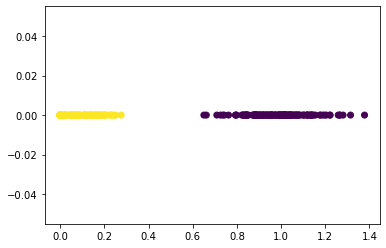

In [31]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)

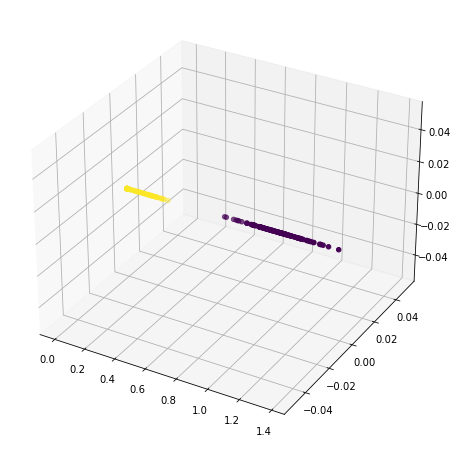

In [32]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_2dim[:, 0], encoded_2dim[:, 1], c=y);